# Basics tutorial (2020)

### **Exercise 1: Matrix manipulations and numerics warm-up**

The file 'DataFiles/SN_covmat.txt' contains the vectorized version of the covariance matrix of an old supernova data set (the 'JLA data set').

1. Read in the covariance matrix, find its dimension, and convert it from a vector to a matrix.

In [5]:
# Imports.
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Read in data.
filename = 'DataFiles/SN_covmat.txt'
data = np.loadtxt(filename)

In [7]:
# Dimension
num_ele = np.shape(data)[0]
print('Shape is',num_ele)

Shape is 961


In [8]:
# Convert to matrix.
matrix_size = int(np.sqrt(num_ele))
cov_mat = np.reshape(data,(31,31))
print('Size matrix is',matrix_size,'by',matrix_size)

Size matrix is 31 by 31


2. Plot the covariance matrix.

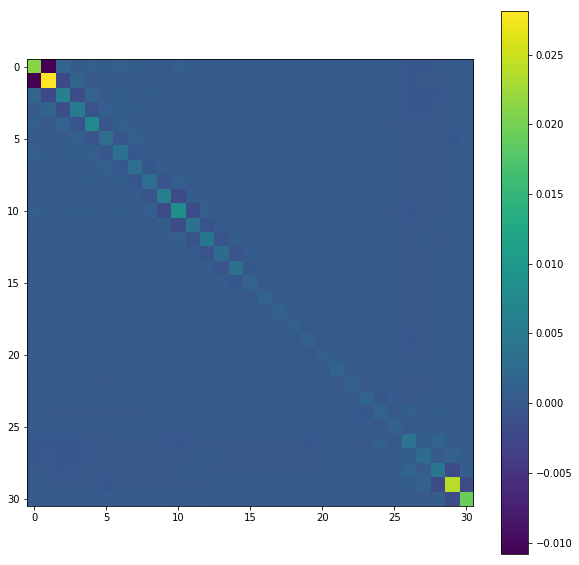

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(cov_mat)
plt.colorbar()
plt.show(); plt.close()

3. Compute and plot the correlation matrix.

In [10]:
# Compute it
cor_mat = np.corrcoef(cov_mat)

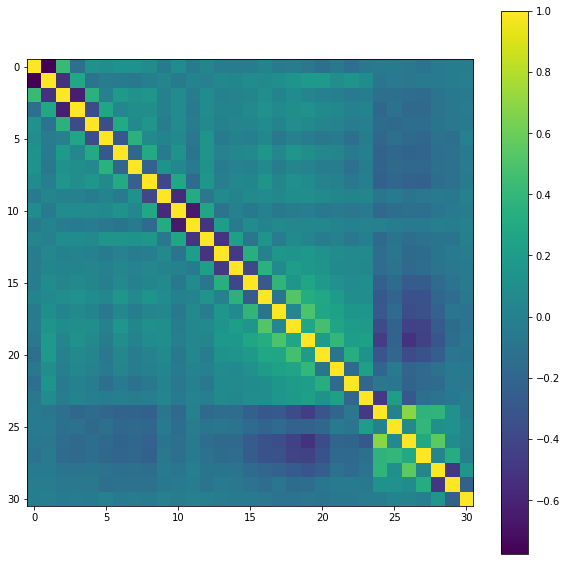

In [11]:
# Print it.
plt.figure(figsize=(10,10))
plt.imshow(cor_mat)
plt.colorbar()
plt.show(); plt.close()

4. Which two data points are the most correlated of them all? Which ones are the least correlated?

**Answer**:The two data points that are most correlated is the maximum value of the matrix, not counting the diagonal values. The least correlated values is the one that has the lowest value.

In [12]:
# Change diagonal values to NaN's
for i in range(len(cor_mat)):
    for j in range(len(cor_mat[i])):
        if i == j:
            cor_mat[i][j] = np.nan

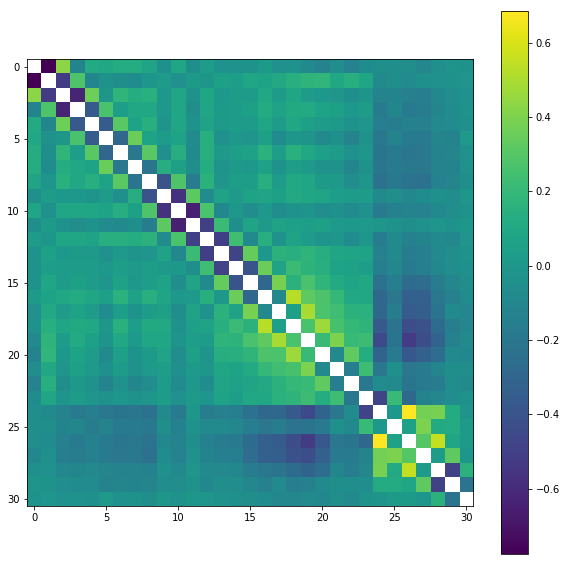

In [13]:
# Print it.
plt.figure(figsize=(10,10))
plt.imshow(cor_mat)
plt.colorbar()
plt.show(); plt.close()

In [14]:
most_cor = np.unravel_index(np.nanargmax(cor_mat),cor_mat.shape)
least_cor = np.unravel_index(np.nanargmin(cor_mat),cor_mat.shape)

print(most_cor,cor_mat[most_cor])
print(least_cor,cor_mat[least_cor])

(24, 26) 0.6864175966534766
(0, 1) -0.7769915917059651


5. If you were forced to throw out 10 data points, but you wish to lose as little information as possible, which data points would you throw out?

**Answer**: High correlation because information can be retrieved largely  by other points it was correlated up. So if you two datapoints which are largely correlated, you can throw 1 away.

6. Which data point has the largest error bar, as it would usually be plotted when showing a plot of the data and their error bars?

**Answer**: Data point with the largest variance. Largest value of the covariance matrix on the diagonal.

7. Compute the determinant of the covariance matrix.  Think of the properties of the determinant inlinear maps as they appear in linear algebra. Which meaning does the determinant of the covariance matrix have?

In [15]:
# Change diagonal values back to 1.
for i in range(len(cor_mat)):
    for j in range(len(cor_mat[i])):
        if i == j:
            cor_mat[i][j] = 1

In [16]:
# Compute determinant.
det = np.linalg.det(cor_mat)
print('Determinant =',det)

Determinant = 8.906418026823213e-22


**Answer**: The meaning of the determinant in the covariance matrix for a Gaussian distribution gives the differential or continuous entropy.

8.  Invert the covariance matrix, and plot the inverse (which is often called ‘precision matrix’)

In [17]:
# Invert matrix.
inv_cov_mat = np.linalg.inv(cov_mat)

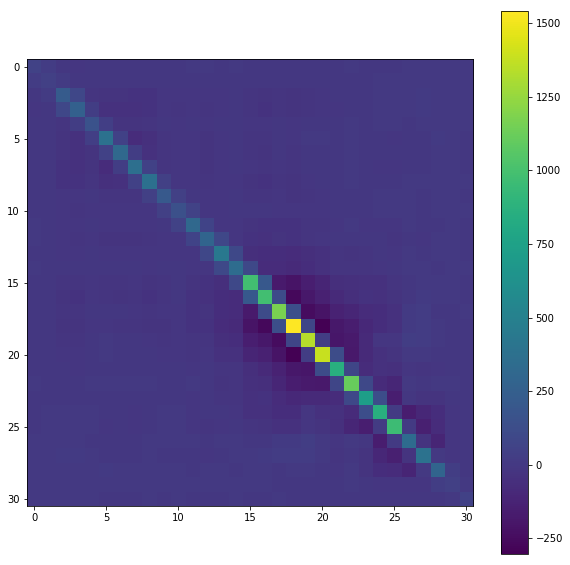

In [19]:
# Print it.
plt.figure(figsize=(10,10))
plt.imshow(inv_cov_mat)
plt.colorbar()
plt.show(); plt.close()

The larger the value in the precision matrix, the more precise the value (not a large variance).

### Exercise 2: Simple and/or interesting questions

1. What is the probability that a six-sided dice falls with '5' facing upwards?

**Answer**: $ \frac{1}{6} $

2. What is the probability that a fiar coin lands 'heads'?

**Answer**: $\frac{1}{2}$

3. After having thrown a dice infinitely many times, what is the average score?

**Answer**: $\frac{1+2+3+4+5+6}{6} = \frac{21}{6} = 3.5$

4. When rolling a dice 1000 times, what is the distribution of how often sixes were thrown?

**Answer**: A binomial distribution. *Actual answer*: this is correct, but you have to explain it. It is a process with two possible outcomes ("bi") and for each draw the results are independend from eachother.

5. If colour blindness is inherited via the X-chromosome, and a family of four has a colour-blind father, a colour-seeing mother, and a colour-blind son, what is the probability that the family’s daughter is colour-blind as well?

**Answer**: A man has (X,Y) and a woman (X,X) and you inherit one chromosome from your father and one from your mother.

$$1/2$$

6.  Upon birth, the gender of a new-born is not always determined through genetics. Animal species exist which determine gender through other factors than genetics, e.g. breeding temperature. However, essentially all species where gender is genetically determined (i.e. via equivalents of the human X and Y-chromosomes) have a gender ratio of 50:50. Why is that so? Would the species not breed faster if there were many more females than males?

**Answer**: Difference in men/woman population would grow exponentially.

7. You play a game of hangman, meaning you have to guess a word, indicated e.g. as ‘__ __ __ ... __’. Which letter of the alphabet is the most informative?

**Answer**: The letter that occurs the most, then the probability that that letter is in the word you're looking for is highest.

### 3. Bargaining for funding.

You wish to fund an experiment of yours. If you have more money, then you can afford more data points. The more data points you have, the more precise will your measurement be. Sadly, the more money you
want, the less inclined to support you will the funding agency be. In the end, you have to give scaling relations.

1. Imagine your data points are iid, drawn from a Gaussian distribution of unknown mean but known variance. You wish to estimate the mean. How does the error of the mean decrease with the number of data points funded?

**Answer**: Known is

$$ \text{var}(\sigma_\bar{x}) = \frac{\sigma^2}{n} = \sigma_\bar{x}^2 $$

$$ \sigma_\bar{x} = \frac{\sigma}{\sqrt(n)} $$

So the error of the mean scales with $\frac{1}{\sqrt{n}}$

2. Imagine your data points are again iid (identically and independently distributed), but this time drawn from a Uniform distribution of unknown upper limit. You wish to estimate the upper bound. How does the error on the upper bound decrease with the number of data points funded?

**Answer**: Calculate the variance of the estimator. https://math.stackexchange.com/questions/346112/computing-the-bias-and-standard-error-of-a-uniform-distribution-with-unknown-upp

### 4. Background estimation: where would you measure next?

Consider the situation in Fig. 1. The data points there shown have standard deviations which are constant per box, where the boxes are demarked by the vertical dashed lines. The standard deviations are indicated in each box. The noise is additive Gaussian noise and the points are uncorrelated. You think the data points come from a constant off-set $c_1$, and you wish to measure this constant as precisely as possible. You have enough money to measure once more.

1. To which box would you add a data point?

**Answer**: The box with lowest standard deviation which is $\sigma = 1$.

2. What is the variance of your estimate of $c$?

**Answer**: 

$$ \text{var}(\hat{\mu}) = \frac{1}{n} \sum_i \sigma_i^2 = \frac{1}{6} \Big( 3 \cdot 1^2 + 2 \cdot 2^2 + 1 \cdot \sqrt(2)^2 \Big)= \frac{13}{6} = 2\frac{1}{6}$$

### Exercise 5: Being conservative: where would you measure now?

Consider the situation in Fig. 2. Unphysical regions where there cannot be any data are shaded. You have control over the variable x: by chosing x you can decide where to measure next. Data points which you already have are indicated. The standard deviations $\sigma$ per box refer to the error bars attached to the data shown. All errors are uncorrelated. You do not know the functional relation between x and y. You therefore replace it by a spline and you wish to estimate the position of the spline points. These are indicated by black squares. The connecting line is the then resulting spline. The squares can
move up and down, but not left and right.

 - To learn most about the function, where do you measuren next?

 - Sketch possible shapes of the function.

**Answer**: In the box with $\sigma = 3$, since there not measures there yet and there is a relative high uncertainty. So putthing measures there narrows down the largest uncertainty of the spline points/function. For possible sketches of the function, anything that goes through the all error bars is possible.

### Exercise 6. Experimental design:

Consider the situation in Fig. 3. The black squares are again spline points whose position you wish to estimate. They can only move vertically. You currently have money to measure, but some Brexit-related politician might soon decide to not fund your research anymore. You therefore wish to learn as quickly as possible about the splined function, not knowing when funding will stop, i.e. not knowing which is the last data point you can take. 

 - Design the optimal sequence in which to measure. Stop after 10 data points.

**Answer**: You do at least want 1 data point in each box in the beginning. If you do the first 5 datapoints from left to right, you start with the lowest $\sigma$ to the highest, which is nice. After that you would like to narrow down the uncertainty so you go from right to left again. So the sequence would be (if you number the boxes 1 to 5 from left to right):

**Actual answer**: The first 5 points are correct. But the last 5 points you have to decide on a case by case basis. If you think the function is constant, then you want to measure at the lowest variance. If the points are everywhere, then it might be a quickly varying function and you want to measure points close together.

1,2,3,4,5,5,4,3,2,1.

### Exercise 7: The pdf of astronomical magnitudes

Last year it was said that this exercise was too long and not relevant for the exam, so it'll probably be the same this year.

### Exercise 8: Absolute values of Gaussians

Using the univariate Gaussian distribution for a random variate $x$,

$$ x \sim \frac{1}{\sqrt{2\pi \sigma^2}} \exp \Big( -\frac{1}{2} \frac{(x-\mu)^2}{\sigma^2} \Big) $$

derive from the law of total probability, $ \mathcal{P}(A) + \mathcal{P}(\bar{A}) = 1 $, the distribution of the absolutie value $|x|$.

**Answer**:

$\mathcal{P}(|X| \leq x) = \mathcal{P}(-x \leq X \leq x)$

$\mathcal{P}(|X| \leq x) + \mathcal{P}(|X| > x) = 1$

$\mathcal{P}(-x \leq X \leq x) + \mathcal{P}(X < -x \text{ and } X > x) = 1$

$\mathcal{P}(X \leq x) - \mathcal{P}(X \leq -x) = \mathcal{P}(|X| \leq x)$

$\mathcal{P}(X \leq x) = \text{CDF}(x) - \text{CDF}(-x) $

$\text{PDF}(|X|) =  \frac{\text{d}}{\text{d}x} ( \text{CDF}(x) - \text{CDF}(-x) ) = \text{PDF}(x) - \text{PDF}(-x) $

### Exercise 9: When tests fail tests.

Too long and not relevant for the exam.